## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  99.179904  1744.970613  0.251491  8.553227  1.343684
1  32.927832  1495.792188  0.163105  7.437460  1.361459
2  87.665118   875.913717  0.995489  1.146217  1.488114
3  95.508423  1564.662114  0.287479  8.130197  1.421140
4  16.624515  1402.658390  0.552897  7.703718  1.339988


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9609671	total: 59.3ms	remaining: 59.2s
1:	learn: 0.9521256	total: 60.4ms	remaining: 30.1s
2:	learn: 0.9419802	total: 62ms	remaining: 20.6s
3:	learn: 0.9312227	total: 64ms	remaining: 15.9s
4:	learn: 0.9187835	total: 64.5ms	remaining: 12.8s
5:	learn: 0.9109148	total: 65.2ms	remaining: 10.8s
6:	learn: 0.9012319	total: 66.1ms	remaining: 9.38s
7:	learn: 0.8899937	total: 66.9ms	remaining: 8.29s
8:	learn: 0.8784495	total: 67.4ms	remaining: 7.42s
9:	learn: 0.8673406	total: 68.1ms	remaining: 6.74s
10:	learn: 0.8576668	total: 68.7ms	remaining: 6.17s
11:	learn: 0.8483435	total: 69.2ms	remaining: 5.7s
12:	learn: 0.8393076	total: 69.7ms	remaining: 5.29s
13:	learn: 0.8285701	total: 70.2ms	remaining: 4.94s
14:	learn: 0.8186288	total: 70.6ms	remaining: 4.64s
15:	learn: 0.8100603	total: 71.2ms	remaining: 4.38s
16:	learn: 0.7981963	total: 71.7ms	remaining: 4.15s
17:	learn: 0.7885929	total: 72.3ms	remaining: 3.94s
18:	learn: 0.7809778	total: 72.6ms	remaining: 3.7

24:	learn: 0.7337431	total: 77.3ms	remaining: 3.01s
25:	learn: 0.7264748	total: 78ms	remaining: 2.92s
26:	learn: 0.7183507	total: 78.7ms	remaining: 2.84s
27:	learn: 0.7089421	total: 79.5ms	remaining: 2.76s
28:	learn: 0.7008423	total: 80.3ms	remaining: 2.69s
29:	learn: 0.6928844	total: 81ms	remaining: 2.62s
30:	learn: 0.6861564	total: 82.1ms	remaining: 2.56s
31:	learn: 0.6798618	total: 83ms	remaining: 2.51s
32:	learn: 0.6729416	total: 83.9ms	remaining: 2.46s
33:	learn: 0.6674173	total: 84.7ms	remaining: 2.41s
34:	learn: 0.6601229	total: 85.4ms	remaining: 2.35s
35:	learn: 0.6540905	total: 86.2ms	remaining: 2.31s
36:	learn: 0.6473065	total: 86.9ms	remaining: 2.26s
37:	learn: 0.6415676	total: 87.7ms	remaining: 2.22s
38:	learn: 0.6355848	total: 88.3ms	remaining: 2.17s
39:	learn: 0.6293223	total: 88.8ms	remaining: 2.13s
40:	learn: 0.6226763	total: 89.2ms	remaining: 2.09s
41:	learn: 0.6169038	total: 89.7ms	remaining: 2.05s
42:	learn: 0.6103570	total: 90.2ms	remaining: 2.01s
43:	learn: 0.60461

192:	learn: 0.2227808	total: 156ms	remaining: 654ms
193:	learn: 0.2214950	total: 157ms	remaining: 653ms
194:	learn: 0.2205745	total: 158ms	remaining: 651ms
195:	learn: 0.2195792	total: 158ms	remaining: 649ms
196:	learn: 0.2182372	total: 158ms	remaining: 646ms
197:	learn: 0.2169450	total: 159ms	remaining: 645ms
198:	learn: 0.2159674	total: 160ms	remaining: 645ms
199:	learn: 0.2149838	total: 161ms	remaining: 643ms
200:	learn: 0.2143292	total: 161ms	remaining: 641ms
201:	learn: 0.2134751	total: 162ms	remaining: 639ms
202:	learn: 0.2121576	total: 162ms	remaining: 636ms
203:	learn: 0.2111363	total: 162ms	remaining: 634ms
204:	learn: 0.2102630	total: 163ms	remaining: 632ms
205:	learn: 0.2093067	total: 163ms	remaining: 629ms
206:	learn: 0.2083034	total: 164ms	remaining: 627ms
207:	learn: 0.2071811	total: 164ms	remaining: 625ms
208:	learn: 0.2061443	total: 164ms	remaining: 622ms
209:	learn: 0.2054074	total: 165ms	remaining: 620ms
210:	learn: 0.2045979	total: 165ms	remaining: 618ms
211:	learn: 

362:	learn: 0.1203618	total: 230ms	remaining: 403ms
363:	learn: 0.1201107	total: 231ms	remaining: 403ms
364:	learn: 0.1197157	total: 231ms	remaining: 402ms
365:	learn: 0.1192785	total: 233ms	remaining: 403ms
366:	learn: 0.1190311	total: 233ms	remaining: 402ms
367:	learn: 0.1185565	total: 234ms	remaining: 401ms
368:	learn: 0.1182560	total: 234ms	remaining: 401ms
369:	learn: 0.1177329	total: 235ms	remaining: 400ms
370:	learn: 0.1173378	total: 235ms	remaining: 399ms
371:	learn: 0.1167733	total: 236ms	remaining: 398ms
372:	learn: 0.1162684	total: 236ms	remaining: 397ms
373:	learn: 0.1160334	total: 237ms	remaining: 396ms
374:	learn: 0.1154881	total: 237ms	remaining: 395ms
375:	learn: 0.1150580	total: 237ms	remaining: 394ms
376:	learn: 0.1148184	total: 238ms	remaining: 393ms
377:	learn: 0.1143958	total: 238ms	remaining: 392ms
378:	learn: 0.1139880	total: 239ms	remaining: 392ms
379:	learn: 0.1137512	total: 240ms	remaining: 391ms
380:	learn: 0.1133498	total: 240ms	remaining: 391ms
381:	learn: 

539:	learn: 0.0694820	total: 319ms	remaining: 272ms
540:	learn: 0.0693101	total: 319ms	remaining: 271ms
541:	learn: 0.0690312	total: 320ms	remaining: 271ms
542:	learn: 0.0687377	total: 321ms	remaining: 270ms
543:	learn: 0.0684723	total: 321ms	remaining: 269ms
544:	learn: 0.0683029	total: 322ms	remaining: 269ms
545:	learn: 0.0680447	total: 322ms	remaining: 268ms
546:	learn: 0.0678784	total: 323ms	remaining: 267ms
547:	learn: 0.0675744	total: 323ms	remaining: 266ms
548:	learn: 0.0672886	total: 323ms	remaining: 266ms
549:	learn: 0.0669932	total: 324ms	remaining: 265ms
550:	learn: 0.0667075	total: 324ms	remaining: 264ms
551:	learn: 0.0664352	total: 325ms	remaining: 263ms
552:	learn: 0.0662234	total: 325ms	remaining: 263ms
553:	learn: 0.0660189	total: 325ms	remaining: 262ms
554:	learn: 0.0656769	total: 326ms	remaining: 261ms
555:	learn: 0.0653918	total: 326ms	remaining: 261ms
556:	learn: 0.0651461	total: 327ms	remaining: 260ms
557:	learn: 0.0649842	total: 327ms	remaining: 259ms
558:	learn: 

703:	learn: 0.0425059	total: 392ms	remaining: 165ms
704:	learn: 0.0423135	total: 393ms	remaining: 165ms
705:	learn: 0.0422274	total: 394ms	remaining: 164ms
706:	learn: 0.0421432	total: 394ms	remaining: 163ms
707:	learn: 0.0420097	total: 395ms	remaining: 163ms
708:	learn: 0.0419271	total: 395ms	remaining: 162ms
709:	learn: 0.0417639	total: 396ms	remaining: 162ms
710:	learn: 0.0415447	total: 396ms	remaining: 161ms
711:	learn: 0.0414316	total: 396ms	remaining: 160ms
712:	learn: 0.0412807	total: 397ms	remaining: 160ms
713:	learn: 0.0411937	total: 397ms	remaining: 159ms
714:	learn: 0.0410042	total: 398ms	remaining: 159ms
715:	learn: 0.0409243	total: 398ms	remaining: 158ms
716:	learn: 0.0408141	total: 399ms	remaining: 157ms
717:	learn: 0.0407362	total: 399ms	remaining: 157ms
718:	learn: 0.0405520	total: 400ms	remaining: 156ms
719:	learn: 0.0404686	total: 400ms	remaining: 156ms
720:	learn: 0.0403927	total: 400ms	remaining: 155ms
721:	learn: 0.0402490	total: 401ms	remaining: 154ms
722:	learn: 

895:	learn: 0.0248585	total: 480ms	remaining: 55.7ms
896:	learn: 0.0247949	total: 482ms	remaining: 55.3ms
897:	learn: 0.0247372	total: 482ms	remaining: 54.8ms
898:	learn: 0.0246736	total: 483ms	remaining: 54.2ms
899:	learn: 0.0246146	total: 483ms	remaining: 53.7ms
900:	learn: 0.0245564	total: 484ms	remaining: 53.1ms
901:	learn: 0.0244652	total: 484ms	remaining: 52.6ms
902:	learn: 0.0243935	total: 484ms	remaining: 52ms
903:	learn: 0.0243575	total: 485ms	remaining: 51.5ms
904:	learn: 0.0242666	total: 485ms	remaining: 50.9ms
905:	learn: 0.0242107	total: 485ms	remaining: 50.4ms
906:	learn: 0.0241639	total: 486ms	remaining: 49.8ms
907:	learn: 0.0240975	total: 486ms	remaining: 49.3ms
908:	learn: 0.0240431	total: 487ms	remaining: 48.7ms
909:	learn: 0.0239844	total: 487ms	remaining: 48.2ms
910:	learn: 0.0239165	total: 487ms	remaining: 47.6ms
911:	learn: 0.0238934	total: 488ms	remaining: 47.1ms
912:	learn: 0.0238707	total: 488ms	remaining: 46.5ms
913:	learn: 0.0238246	total: 489ms	remaining: 46

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.40475818909439853


ABC Pre-generator MAE 0.40679648312437156


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

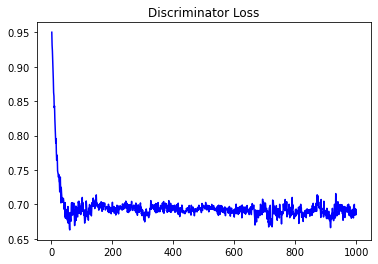

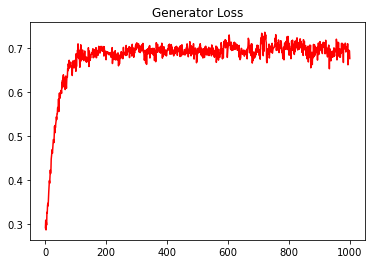

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.6476903449781239


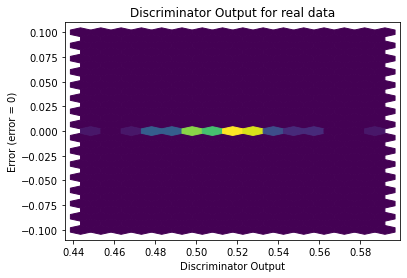

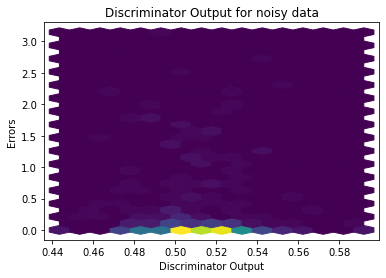

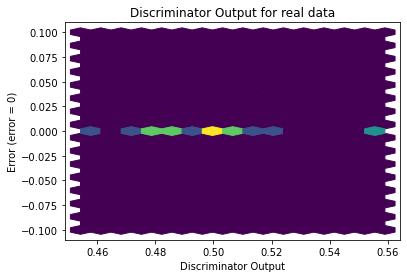

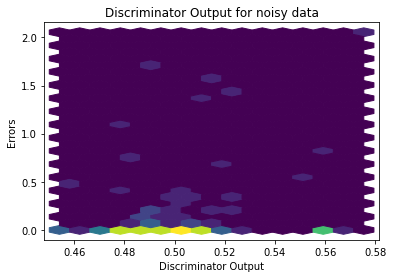

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

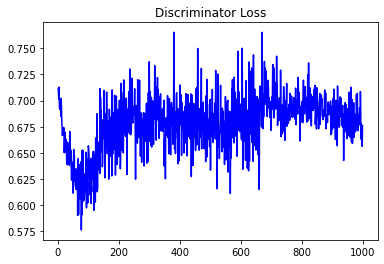

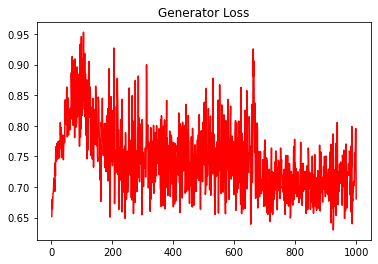

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
1.6377045890241861


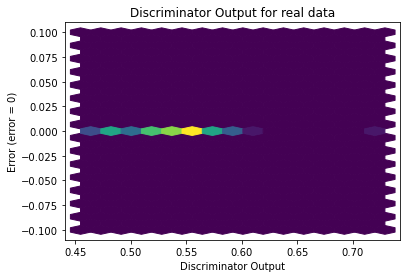

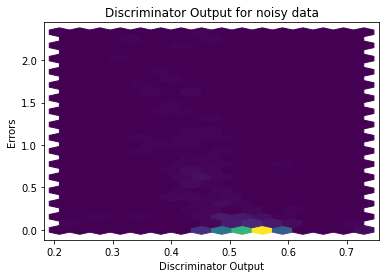

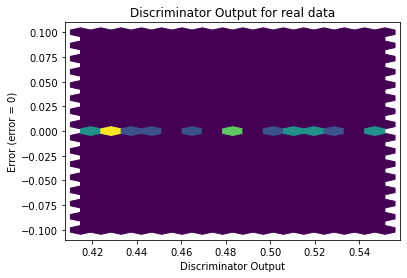

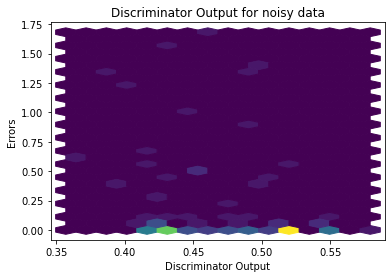

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


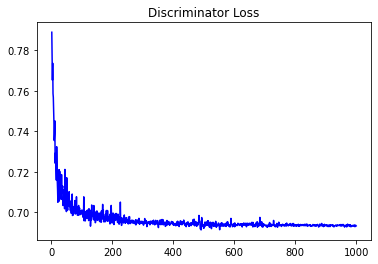

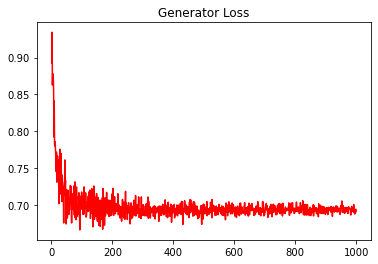

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4350538643747568


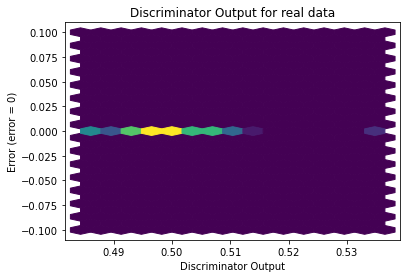

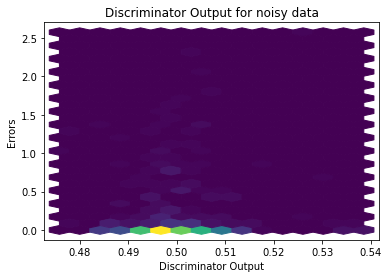

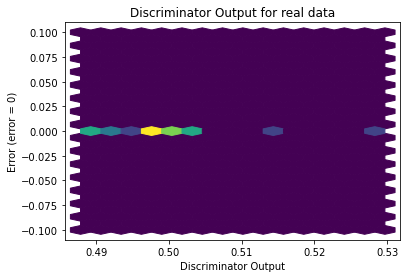

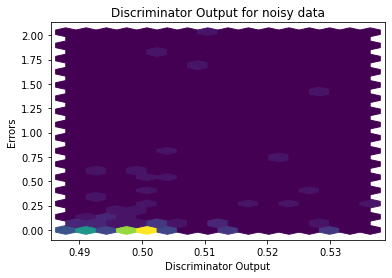

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


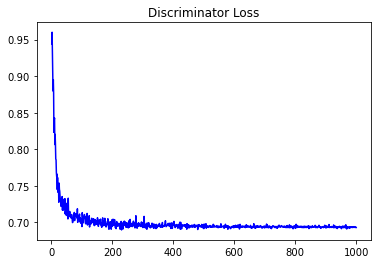

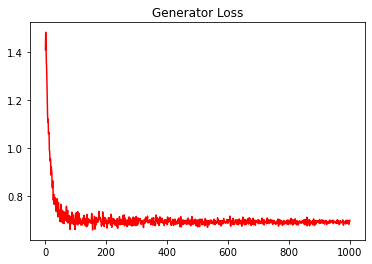

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.42516830409970136


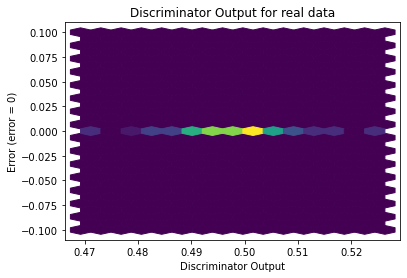

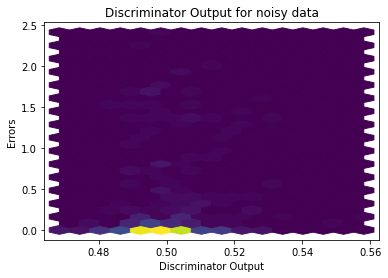

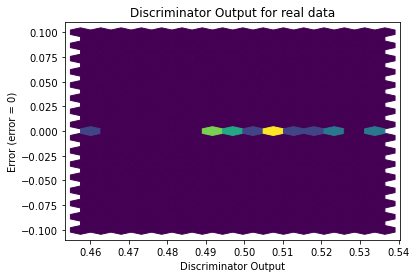

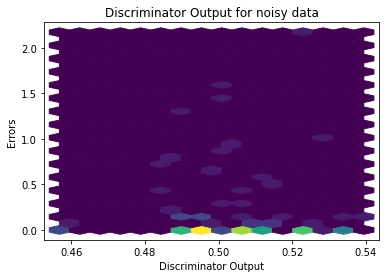

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0853]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0712]], requires_grad=True)
